### Stock Market Prediction And Forecasting Using Bi Directional LSTM

In [25]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional
#import tensorflow as tf

from tensorflow import keras

In [2]:
key='b7229f382db696b1193092be9f3962e64bca5125'

In [3]:
df=pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.shape

(1257, 12)

In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2016-08-03 00:00:00+00:00  105.79  105.84  104.77  104.81  30202641   
       2016-08-04 00:00:00+00:00  105.87  106.00  105.28  105.58  27408650   
       2016-08-05 00:00:00+00:00  107.48  107.65  106.18  106.27  40553402   
       2016-08-08 00:00:00+00:00  108.37  108.37  107.16  107.52  28037220   
       2016-08-09 00:00:00+00:00  108.81  108.94  108.01  108.23  26315204   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2016-08-03 00:00:00+00:00  24.703388  24.715063  24.465204  24.474544   
       2016-08-04 00:00:00+00:00  24.855171  24.885692  24.716657  24.787088   
       2016-08-05 00:00:00+00:00  25.233152  25.273063  24.927950  24.949080   
       2016-08-08 00:00:00+00:00  25.442098  25.442098  25.158026  25.242543   
       2016-08-09 00:00:00+00:00  25.545397  25.575917  25.357581  25.409230   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2016-08-03 00:00:00+00:00  120810564     0.00          1.0  
       2016-08-04 00:00:00+00:00  109634600     0.57          1.0  
       2016-08-05 00:00:00+00:00  162213608     0.00          1.0  
       2016-08-08 00:00:00+00:00  112148880     0.00          1.0  
       2016-08-09 00:00:00+00:00  105260816     0.00          1.0

In [6]:
df.tail()

close    high     low     open     volume  \
symbol date                                                                    
AAPL   2021-07-26 00:00:00+00:00  148.99  149.83  147.70  148.270   72434089   
       2021-07-27 00:00:00+00:00  146.77  149.21  145.55  149.120  104818578   
       2021-07-28 00:00:00+00:00  144.98  146.97  142.54  144.810  118931191   
       2021-07-29 00:00:00+00:00  145.64  146.55  144.58  144.685   54323047   
       2021-07-30 00:00:00+00:00  145.86  146.33  144.11  144.380   70440626   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
AAPL   2021-07-26 00:00:00+00:00    148.99   149.83  147.70  148.270   
       2021-07-27 00:00:00+00:00    146.77   149.21  145.55  149.120   
       2021-07-28 00:00:00+00:00    144.98   146.97  142.54  144.810   
       2021-07-29 00:00:00+00:00    145.64   146.55  144.58  144.685   
       2021-07-30 00:00:00+00:00    145.86   146.33  144.11  144.380   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2021-07-26 00:00:00+00:00   72434089      0.0          1.0  
       2021-07-27 00:00:00+00:00  104818578      0.0          1.0  
       2021-07-28 00:00:00+00:00  118931191      0.0          1.0  
       2021-07-29 00:00:00+00:00   54323047      0.0          1.0  
       2021-07-30 00:00:00+00:00   70440626      0.0          1.0

In [7]:
df1=df.reset_index()['close']

In [8]:
df1

0       105.79
1       105.87
2       107.48
3       108.37
4       108.81
         ...  
1252    148.99
1253    146.77
1254    144.98
1255    145.64
1256    145.86
Name: close, Length: 1257, dtype: float64

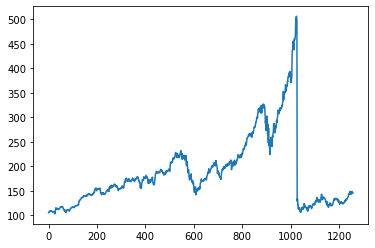

In [9]:
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
df1

0       105.79
1       105.87
2       107.48
3       108.37
4       108.81
         ...  
1252    148.99
1253    146.77
1254    144.98
1255    145.64
1256    145.86
Name: close, Length: 1257, dtype: float64

In [11]:

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.00660115]
 [0.00679968]
 [0.01079512]
 ...
 [0.10385646]
 [0.10549434]
 [0.1060403 ]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 440)

In [15]:
train_data

array([[0.00660115],
       [0.00679968],
       [0.01079512],
       [0.01300377],
       [0.01409569],
       [0.01208557],
       [0.01191185],
       [0.01253226],
       [0.01575839],
       [0.01551022],
       [0.01511316],
       [0.01476573],
       [0.01546059],
       [0.0133512 ],
       [0.01419496],
       [0.01216002],
       [0.01101846],
       [0.00945503],
       [0.00915724],
       [0.0071223 ],
       [0.00737046],
       [0.00893389],
       [0.01141553],
       [0.01134108],
       [0.01297896],
       [0.00593111],
       [0.        ],
       [0.00573258],
       [0.01196149],
       [0.02144133],
       [0.03087155],
       [0.02925849],
       [0.0259331 ],
       [0.02590828],
       [0.02585865],
       [0.028514  ],
       [0.02377407],
       [0.02419595],
       [0.02471709],
       [0.0268513 ],
       [0.0224588 ],
       [0.02461783],
       [0.02330256],
       [0.02449375],
       [0.02461783],
       [0.0267024 ],
       [0.02712428],
       [0.032

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model


In [22]:
model=Sequential()  
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100, 100)          20800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 141,701
Trainable params: 141,701
Non-trainable params: 0
_________________________________________________________________


In [27]:
#model.summary()

In [28]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks = [early_stop])

Epoch 1/100
12/12 [==============================] - 8s 689ms/step - loss: 0.0080 - val_loss: 0.0422
Epoch 2/100
12/12 [==============================] - 4s 354ms/step - loss: 0.0020 - val_loss: 0.0283
Epoch 3/100
12/12 [==============================] - 3s 287ms/step - loss: 8.6973e-04 - val_loss: 0.0206
Epoch 4/100
12/12 [==============================] - 3s 285ms/step - loss: 4.5107e-04 - val_loss: 0.0169
Epoch 5/100
12/12 [==============================] - 4s 341ms/step - loss: 3.5535e-04 - val_loss: 0.0152
Epoch 6/100
12/12 [==============================] - 3s 290ms/step - loss: 3.1643e-04 - val_loss: 0.0139
Epoch 7/100
12/12 [==============================] - 4s 316ms/step - loss: 2.9275e-04 - val_loss: 0.0134
Epoch 8/100
12/12 [==============================] - 4s 300ms/step - loss: 2.8338e-04 - val_loss: 0.0133
Epoch 9/100
12/12 [==============================] - 4s 344ms/step - loss: 2.4650e-04 - val_loss: 0.0123
Epoch 10/100
12/12 [==============================] - 4s 307ms/

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))

178.36241103865694

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

237.7905851546549

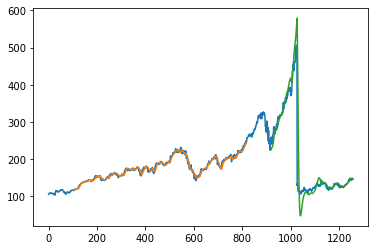

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

440

In [41]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input

[0.04181556482032961,
 0.04672920389120511,
 0.04442128250943028,
 0.051766924756799726,
 0.05568790946992258,
 0.05367778439547355,
 0.04318046456223945,
 0.04184038117927341,
 0.05027794322017076,
 0.048168552709946466,
 0.0420885447687116,
 0.043329362715902375,
 0.044867976970418944,
 0.045314671431407605,
 0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05

In [44]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11052737]
101
1 day input [0.0467292  0.04442128 0.05176692 0.05568791 0.05367778 0.04318046
 0.04184038 0.05027794 0.04816855 0.04208854 0.04332936 0.04486798
 0.04531467 0.04161703 0.04720071 0.04931011 0.05650685 0.05727616
 0.06147012 0.06757495 0.07411406 0.06975878 0.0776752  0.07171928
 0.07784892 0.07700516 0.07869267 0.07439944 0.07536728 0.07149593
 0.07740222 0.07839488 0.07757594 0.07556581 0.07531765 0.07030474
 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027  0.0588644
 0.05653167 0.04873933 0.05419893 0.06035338 0.05742505 0.05390113
 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644
 0.05496824 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203
 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274
 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847
 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374
 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907
 0.10266528 0.10549434 0.11420488 0

8 day output [[0.11170325]]
9 day input [0.04816855 0.04208854 0.04332936 0.04486798 0.04531467 0.04161703
 0.04720071 0.04931011 0.05650685 0.05727616 0.06147012 0.06757495
 0.07411406 0.06975878 0.0776752  0.07171928 0.07784892 0.07700516
 0.07869267 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488
 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604
 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933
 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596
 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554
 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685 0.05859142
 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538
 0.07112368 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393
 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865
 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434
 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875
 0.10837304 0.11274072 

16 day output [[0.11518028]]
17 day input [0.05650685 0.05727616 0.06147012 0.06757495 0.07411406 0.06975878
 0.0776752  0.07171928 0.07784892 0.07700516 0.07869267 0.07439944
 0.07536728 0.07149593 0.07740222 0.07839488 0.07757594 0.07556581
 0.07531765 0.07030474 0.07298491 0.06134604 0.06196645 0.06603633
 0.0672027  0.0588644  0.05653167 0.04873933 0.05419893 0.06035338
 0.05742505 0.05390113 0.05350407 0.06000596 0.05534048 0.05948481
 0.05898849 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228
 0.05065019 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799
 0.06010522 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311
 0.07238932 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378
 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899
 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219
 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072
 0.11380782 0.10829859 0.10385646 0.10549434 0.1060403  0.11052737
 0.11057046 0.110649

24 day output [[0.12025228]]
25 day input [0.07784892 0.07700516 0.07869267 0.07439944 0.07536728 0.07149593
 0.07740222 0.07839488 0.07757594 0.07556581 0.07531765 0.07030474
 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027  0.0588644
 0.05653167 0.04873933 0.05419893 0.06035338 0.05742505 0.05390113
 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644
 0.05496824 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203
 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274
 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847
 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374
 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907
 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792
 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782 0.10829859
 0.10385646 0.10549434 0.1060403  0.11052737 0.11057046 0.11064962
 0.11077293 0.11088822 0.11101633 0.1111903  0.11143658 0.11170325
 0.11196055 0.11226863

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
len(df1)

1257

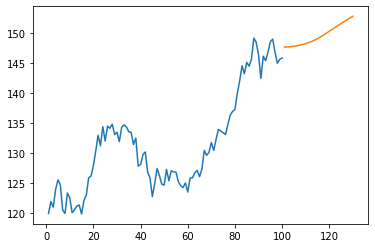

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

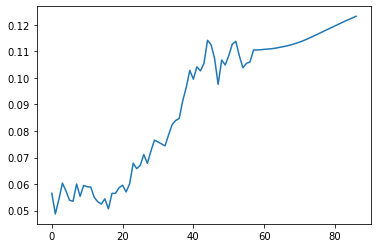

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [50]:
df3=scaler.inverse_transform(df3).tolist()

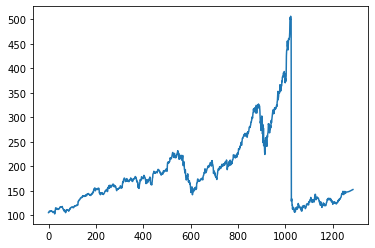

In [51]:
plt.plot(df3)

In [52]:
scaler.inverse_transform(lst_output)

array([[147.66810756],
       [147.68547279],
       [147.71737207],
       [147.76705991],
       [147.81351728],
       [147.86513858],
       [147.93524496],
       [148.03448553],
       [148.14194034],
       [148.24562129],
       [148.36976581],
       [148.52094292],
       [148.68697233],
       [148.87018083],
       [149.07478962],
       [149.30508597],
       [149.54304415],
       [149.79258515],
       [150.04420374],
       [150.30615919],
       [150.56799756],
       [150.8242967 ],
       [151.07572314],
       [151.33710816],
       [151.58685932],
       [151.84533813],
       [152.08963114],
       [152.33142324],
       [152.56627706],
       [152.80184842]])